# ***Abstract***

This notebook has combined the machine learning data cleaning and feature selection, linear regression using AutoML and model interpretion into one. In this notebook, breast cancer dataset will be used. The first part will be knowing the dataset, analyzing the dataset, cleaning the dataset and select important features. The second section will be using the selected features to build a linear regression model and use automl to choose the best model. The third section will try to interpret the linear model with shapley values.

# ***Data Cleaning and Feature Selection***

>This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

>This section has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to analyze and clean the data. Based on the analysis, important features are selected and will be used for linear regression in the next section.

***Dataset Overview***
>Dataset "Breast Cancer" contains 4024 patients diagnosed of breast cancer from 2006 to 2010. Since survival time and status(i.e. Alive or Dead) are both dependent variables.
14 Independent Variables before DATA analyzing, including "Age", "Race", "Marital Status", "T Stage", "N Stage", "6th Stage", "Differentiate", Grade", "A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Regional Node Examined", "Reginol Node Positive". (Note that some variables may be disregarded after analyzing if they are not related to dependent variable or they are dependent on other variables).
Dependent Variable -- Status (i.e. "Alive" or "Dead").
The dependent variable is binary.
There are a total of 4024 patients included in the dataset.

In [1]:
#Installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 34.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d89472dd5aedc9af612ddcbe946d9a7bfc0b125c5a046ebdb96368ea053dba4a
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [2]:
#Import packages and set certain settings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

%matplotlib inline   
%config InlineBackend.figure_format = 'retina' 

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("Breast_Cancer.csv")
df = data

In [4]:
df.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

No data is missing from any column, which means imputing or removing from data is not required.

For the numerical data, we assume it is normally distributed. Therefore, with a Q-Q Plot, from the scatterplot of our data and its goodness of fitting with the line, we can have a glance of our data and see if it is indeed normally distributed.

<Figure size 576x360 with 0 Axes>

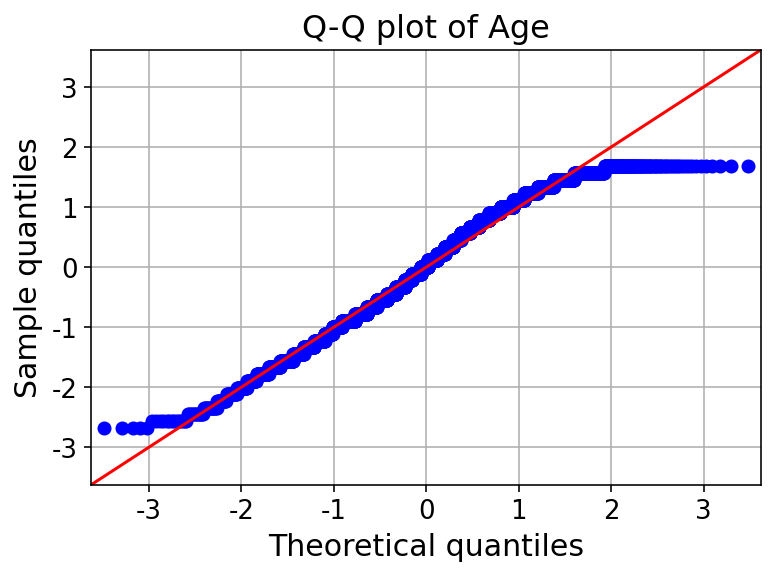

<Figure size 576x360 with 0 Axes>

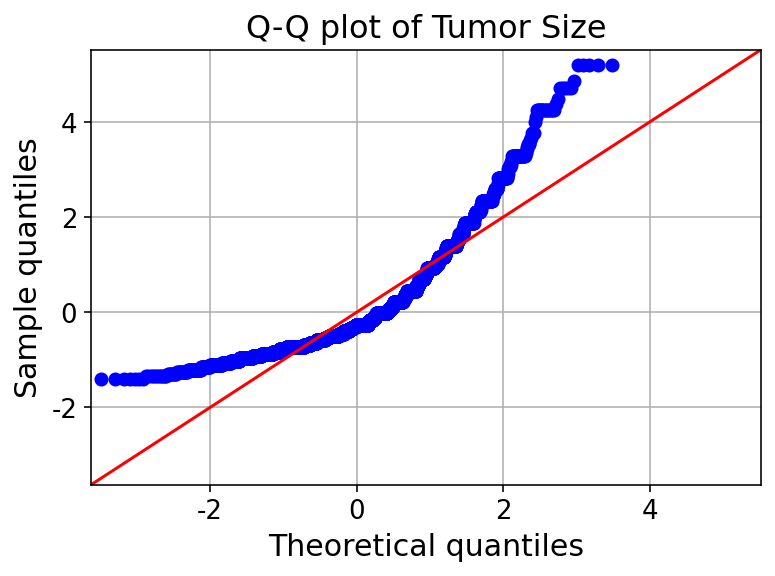

<Figure size 576x360 with 0 Axes>

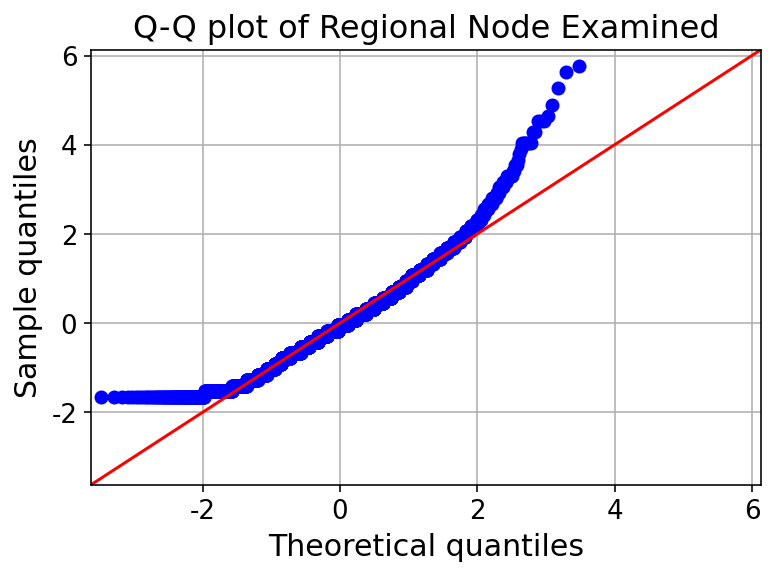

<Figure size 576x360 with 0 Axes>

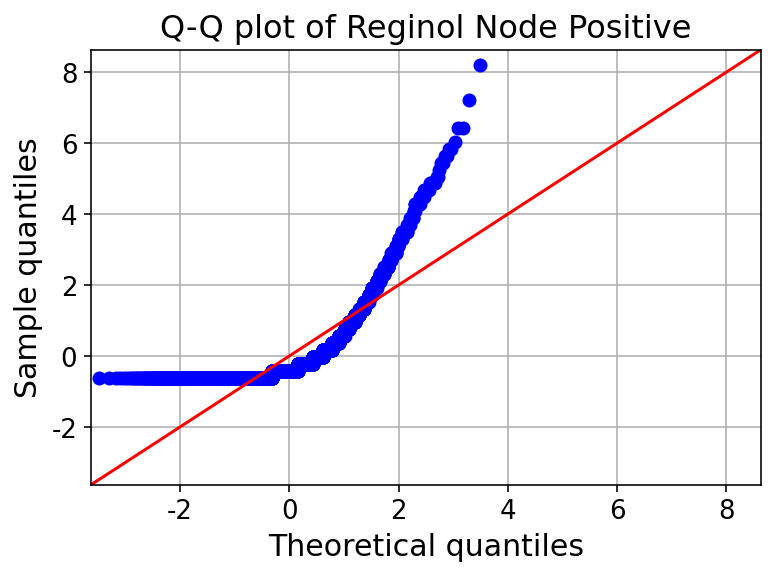

In [8]:
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

1. Except for the independent variable, i.e., "Reginol Node Positive", the other three numerical indepent variables roughly follow the normal distribution with some outliers in the front and the end.
2. Therefore, I would like to further try to use the log function on the independent variable -- Reginol Node Positive, and see if it will follow the normal distribution.

<Figure size 576x360 with 0 Axes>

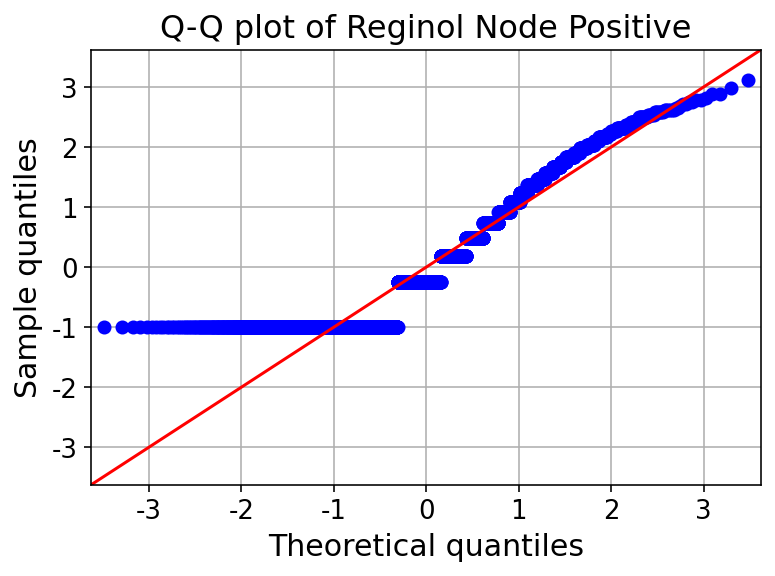

In [9]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Reginol Node Positive']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(np.log(data_norm[c]),line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

It turns out that with a log transformation, the independent variable follow the normal distribution much better, although there still are some outliers in the front.

***Data Visualizing, Transforming, Feature Collection and Analysis***

For each numerical independent variable, a histogram and a boxplot are drawn to visualize the relationship between the independent variable and the dependent variable.

1. Age

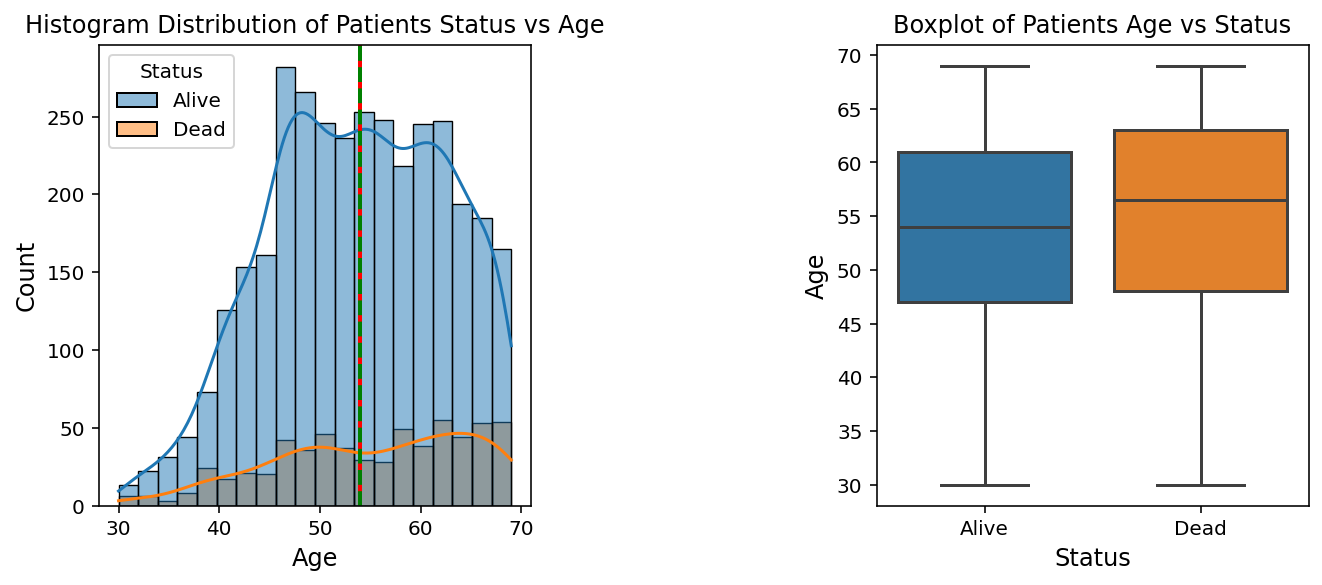

In [12]:
fig, ax = plt.subplots(1,2) 
ax1=ax[0]
ax2=ax[1] 


sns.histplot(data=df, x='Age', hue='Status',kde=True, bins=20, ax = ax1)
ax1.set_xlabel("Age", fontsize=12)
ax1.set_ylabel("Count", fontsize=12) 
ax1.axvline(df['Age'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Age'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Age')

sns.boxplot(x='Status',y='Age', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Age", fontsize=12)
ax2.title.set_text('Boxplot of Patients Age vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2) # 调整子图布局
plt.show()

The number of diagnosed patients, alive patients and dead patients increase along with the age before 47 years old. After 47 years old, both alive and dead patients number have a tendency to decrease. However, as the age increases, the ratio of dead patients and alive patients increases, which means older patients are more likely to die from breast cancer than younger patients.

2. Tumor Size

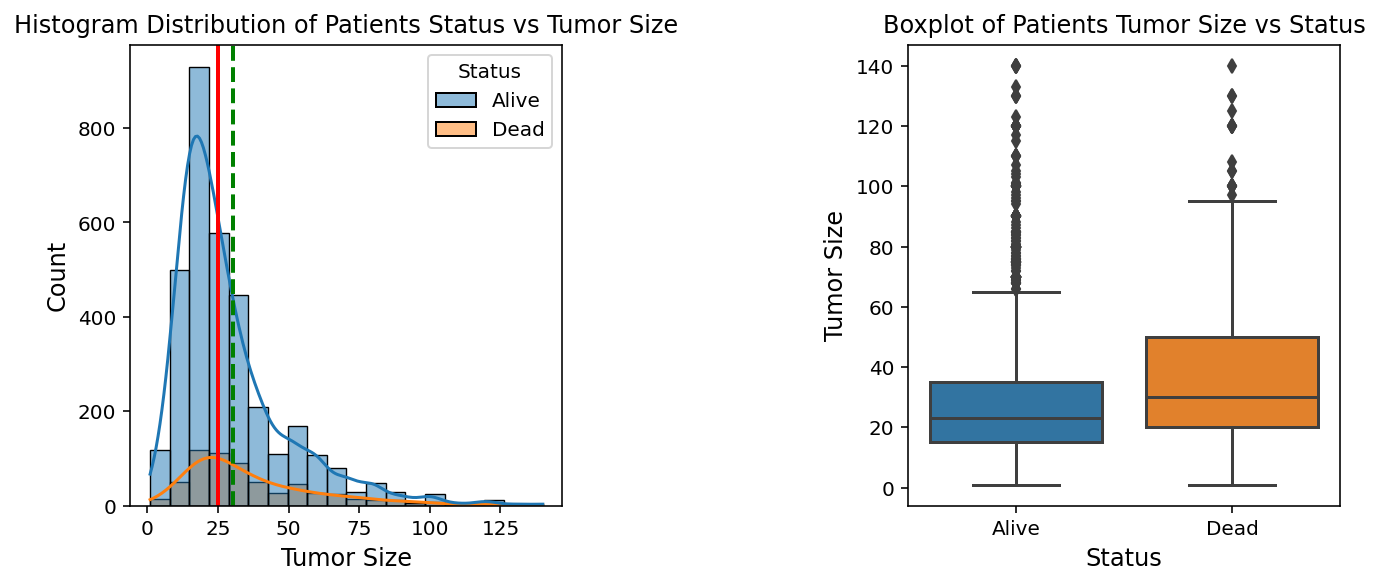

In [13]:
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=df, x='Tumor Size', hue='Status',bins=20, kde=True,ax=ax1) 
ax1.set_xlabel("Tumor Size", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(df['Tumor Size'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Tumor Size'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Tumor Size')

sns.boxplot(x='Status',y='Tumor Size', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)
ax2.set_ylabel("Tumor Size", fontsize=12)
ax2.title.set_text('Boxplot of Patients Tumor Size vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()

The number of diagnosed patients and the dead patients of them achieve to a peak at a certain tumor size of 20mm. Therefore, we can infer that tumors with a size around 20mm are more dangerous than other sizes.

3. Regional Node Examined

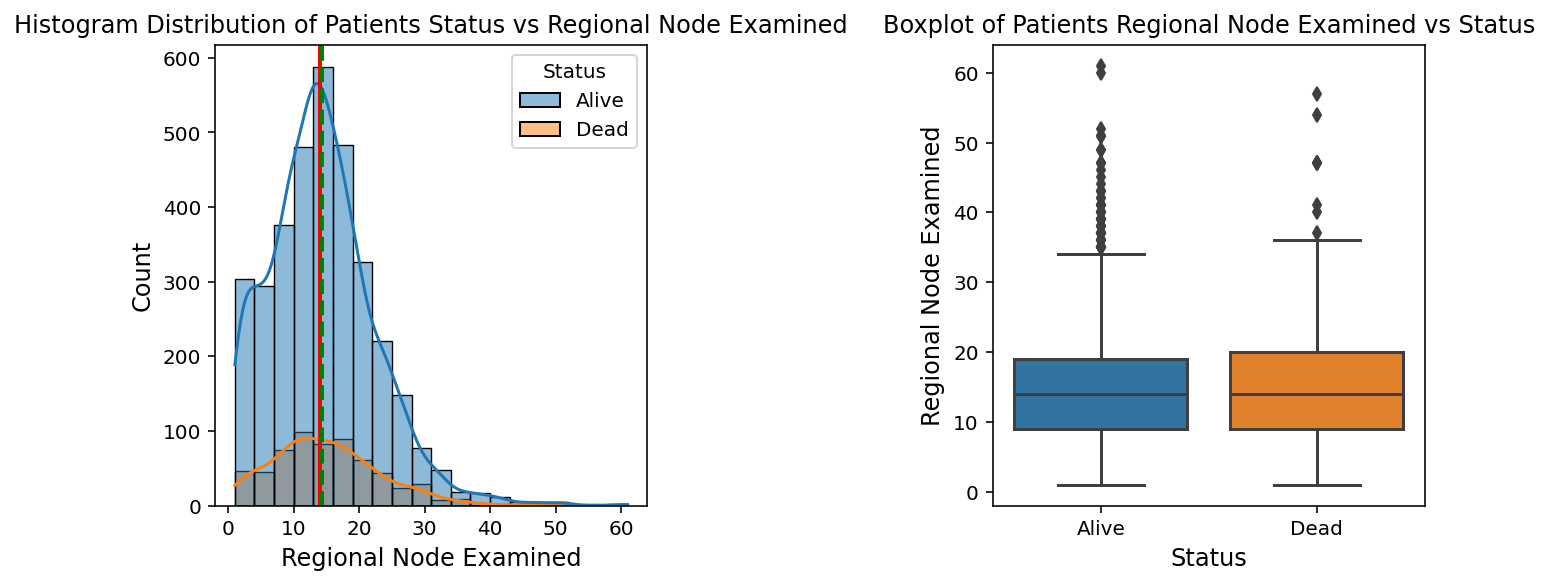

In [14]:
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=df, x='Regional Node Examined', hue='Status',bins=20,kde=True,ax=ax1 )  
ax1.set_xlabel("Regional Node Examined", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(df['Regional Node Examined'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Regional Node Examined'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Regional Node Examined')

sns.boxplot(x='Status',y='Regional Node Examined', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Regional Node Examined", fontsize=12)
ax2.title.set_text('Boxplot of Patients Regional Node Examined vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()

Similarly as tumor size, there also is a dangerous range of regional node examined, which means if 10-20 nodes are found in a certain region, it is more dangerous for a patient.

4. Reginol Node Positive

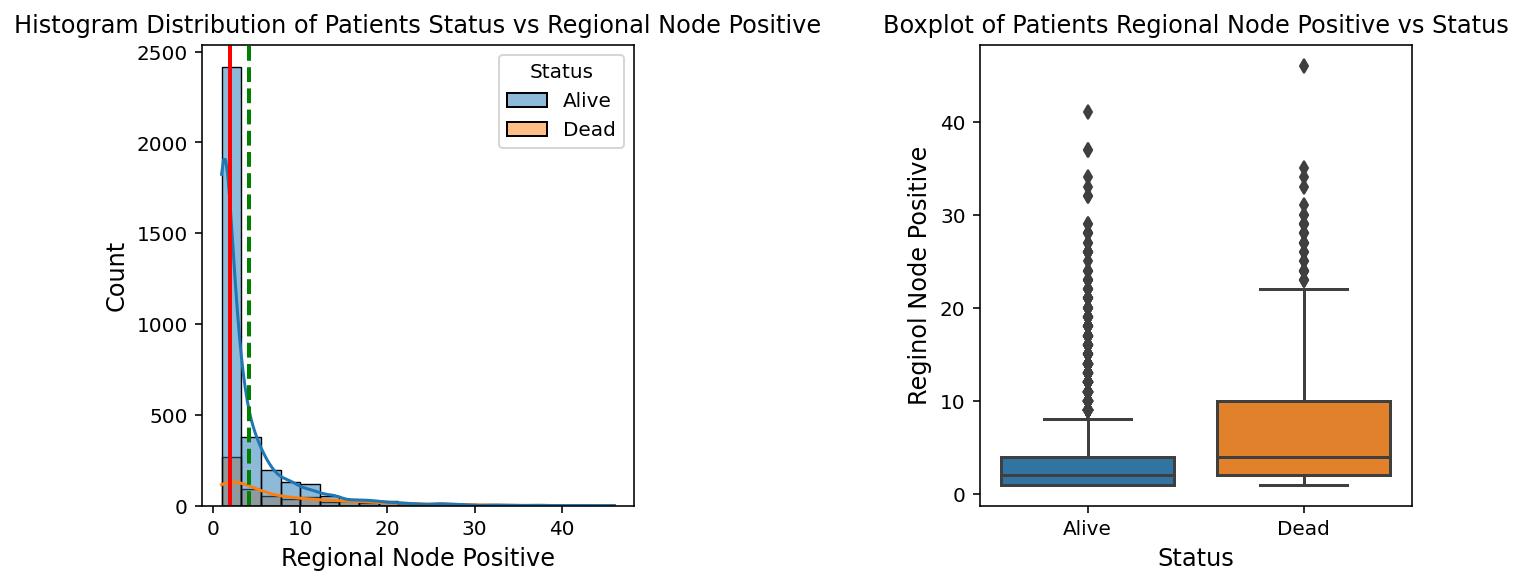

In [15]:
fig, ax = plt.subplots(1,2) 
ax1=ax[0] 
ax2=ax[1] 

sns.histplot(data=df, x='Reginol Node Positive', hue='Status',bins=20,kde=True, ax=ax1 )  
ax1.set_xlabel("Regional Node Positive", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.axvline(df['Reginol Node Positive'].median(), linestyle='-',color='red',linewidth=2)
ax1.axvline(df['Reginol Node Positive'].mean(), linestyle='--',color='green',linewidth=2)
ax1.title.set_text('Histogram Distribution of Patients Status vs Regional Node Positive')

sns.boxplot(x='Status',y='Reginol Node Positive', data=df, ax = ax2)
ax2.set_xlabel("Status", fontsize=12)    
ax2.set_ylabel("Reginol Node Positive", fontsize=12)
ax2.title.set_text('Boxplot of Patients Regional Node Positive vs Status')

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.2)
plt.show()

In these two figures we can tell, as the number of positive nodes found in a certain region increases, the patients are more likely to die.

Get an overview of the ranges of numerical independent variables and dependent variable.

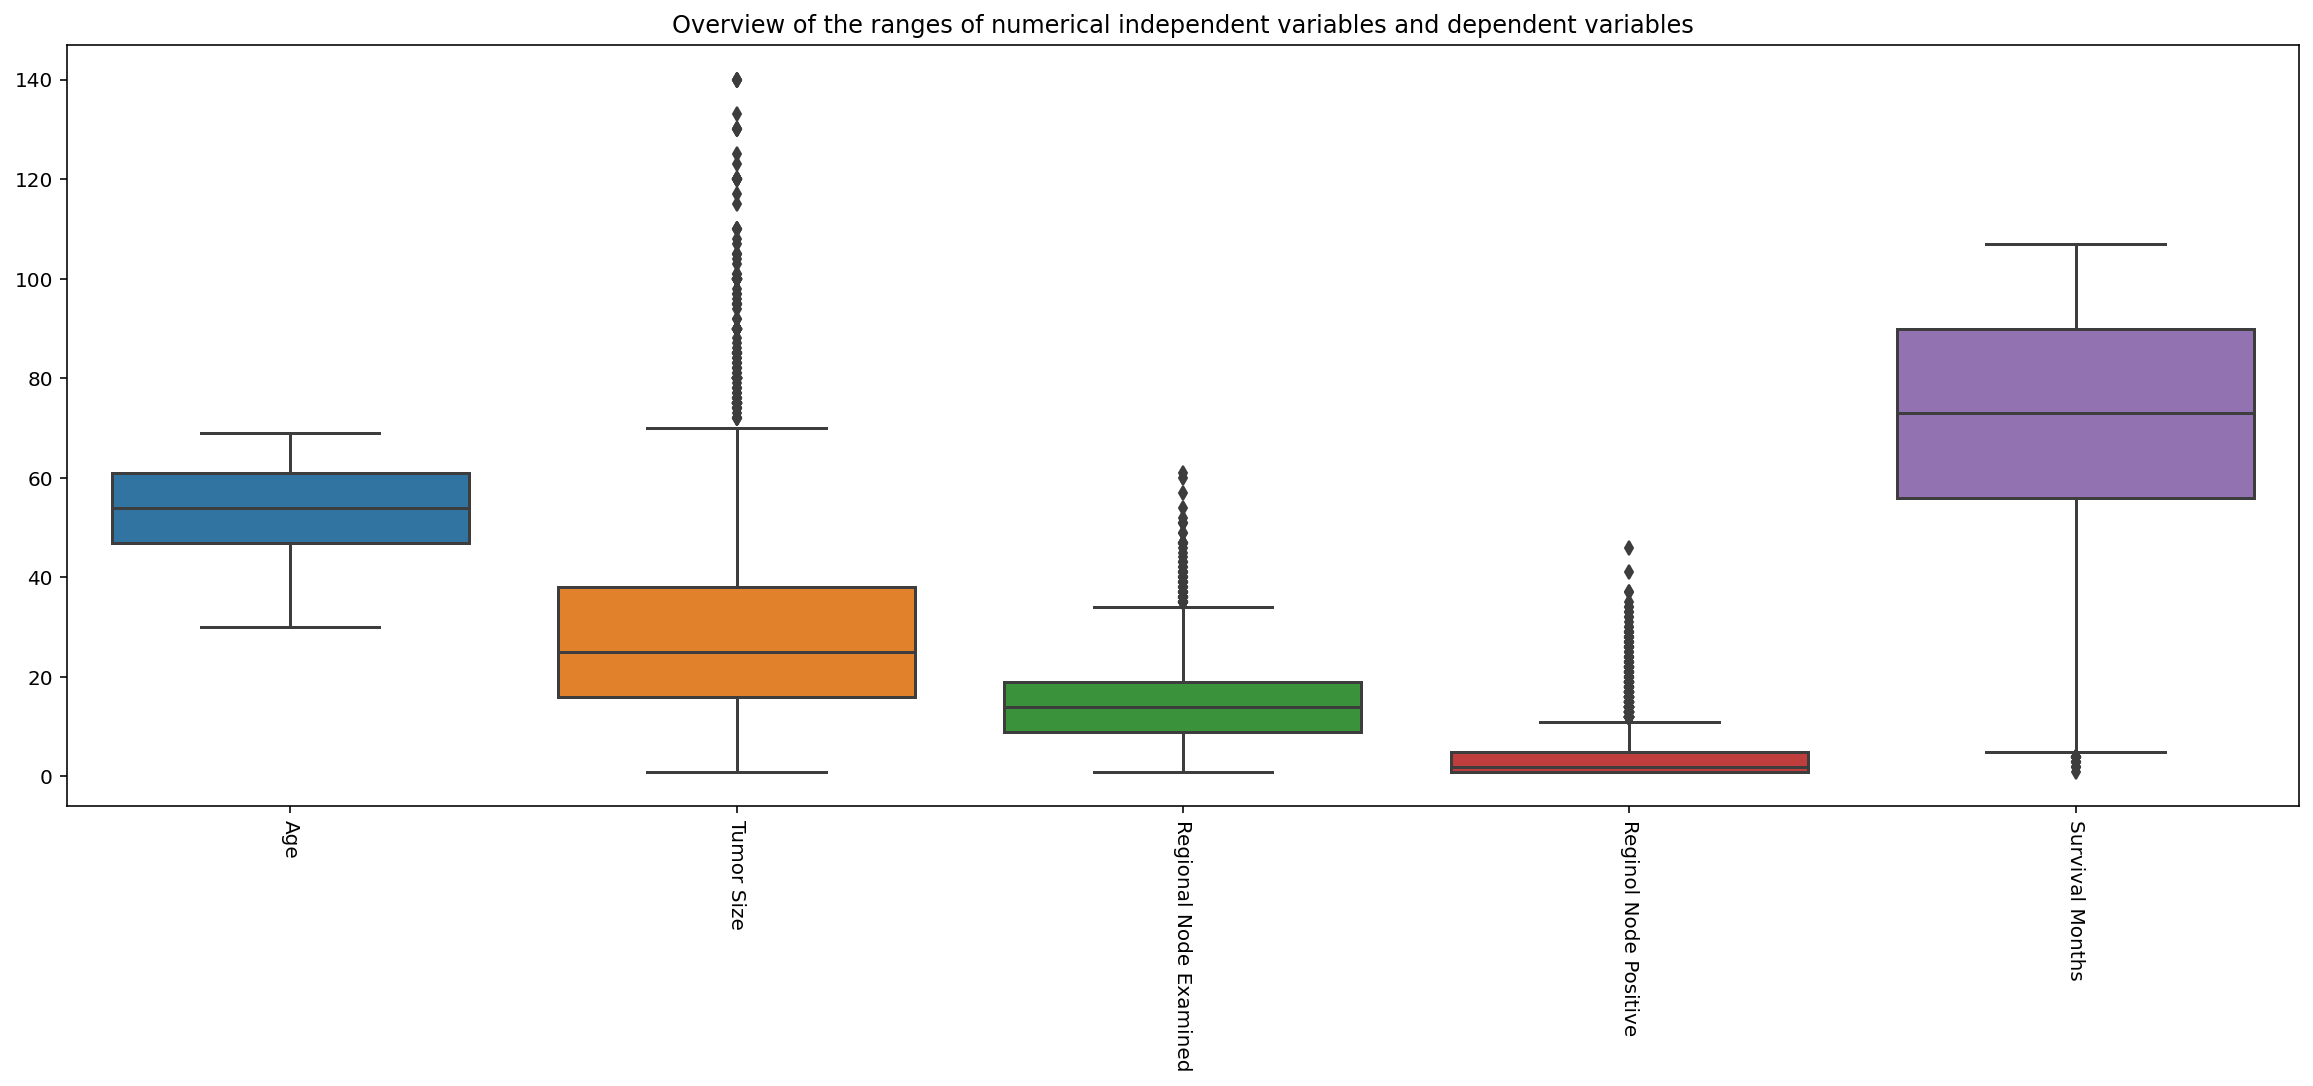

In [17]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=270)
plt.title('Overview of the ranges of numerical independent variables and dependent variables')
sns.boxplot(data=df)

Analysis from the box plot
There are no outliers in the independent variable 'Age', and the data concentrates between 45 to 61 years old, which makes sense because women are usually diagnosed of breast cancer at this age range.
There are several outliers in the independent variable 'Tumor Size' since there are patients diagnosed of breast cancer with extremely large tumor.
Regional Node Examined means the total number of node found in a certain region. There are some outliers, which indicates that some patients have many tumors found in a region.
Reginol Node Positive means the positive node found in a certain region. The outliers in this box plot indicate that many more positive nodes are found in some patients than most patients.

Add categorical independent variables to visualize and interpret the data.

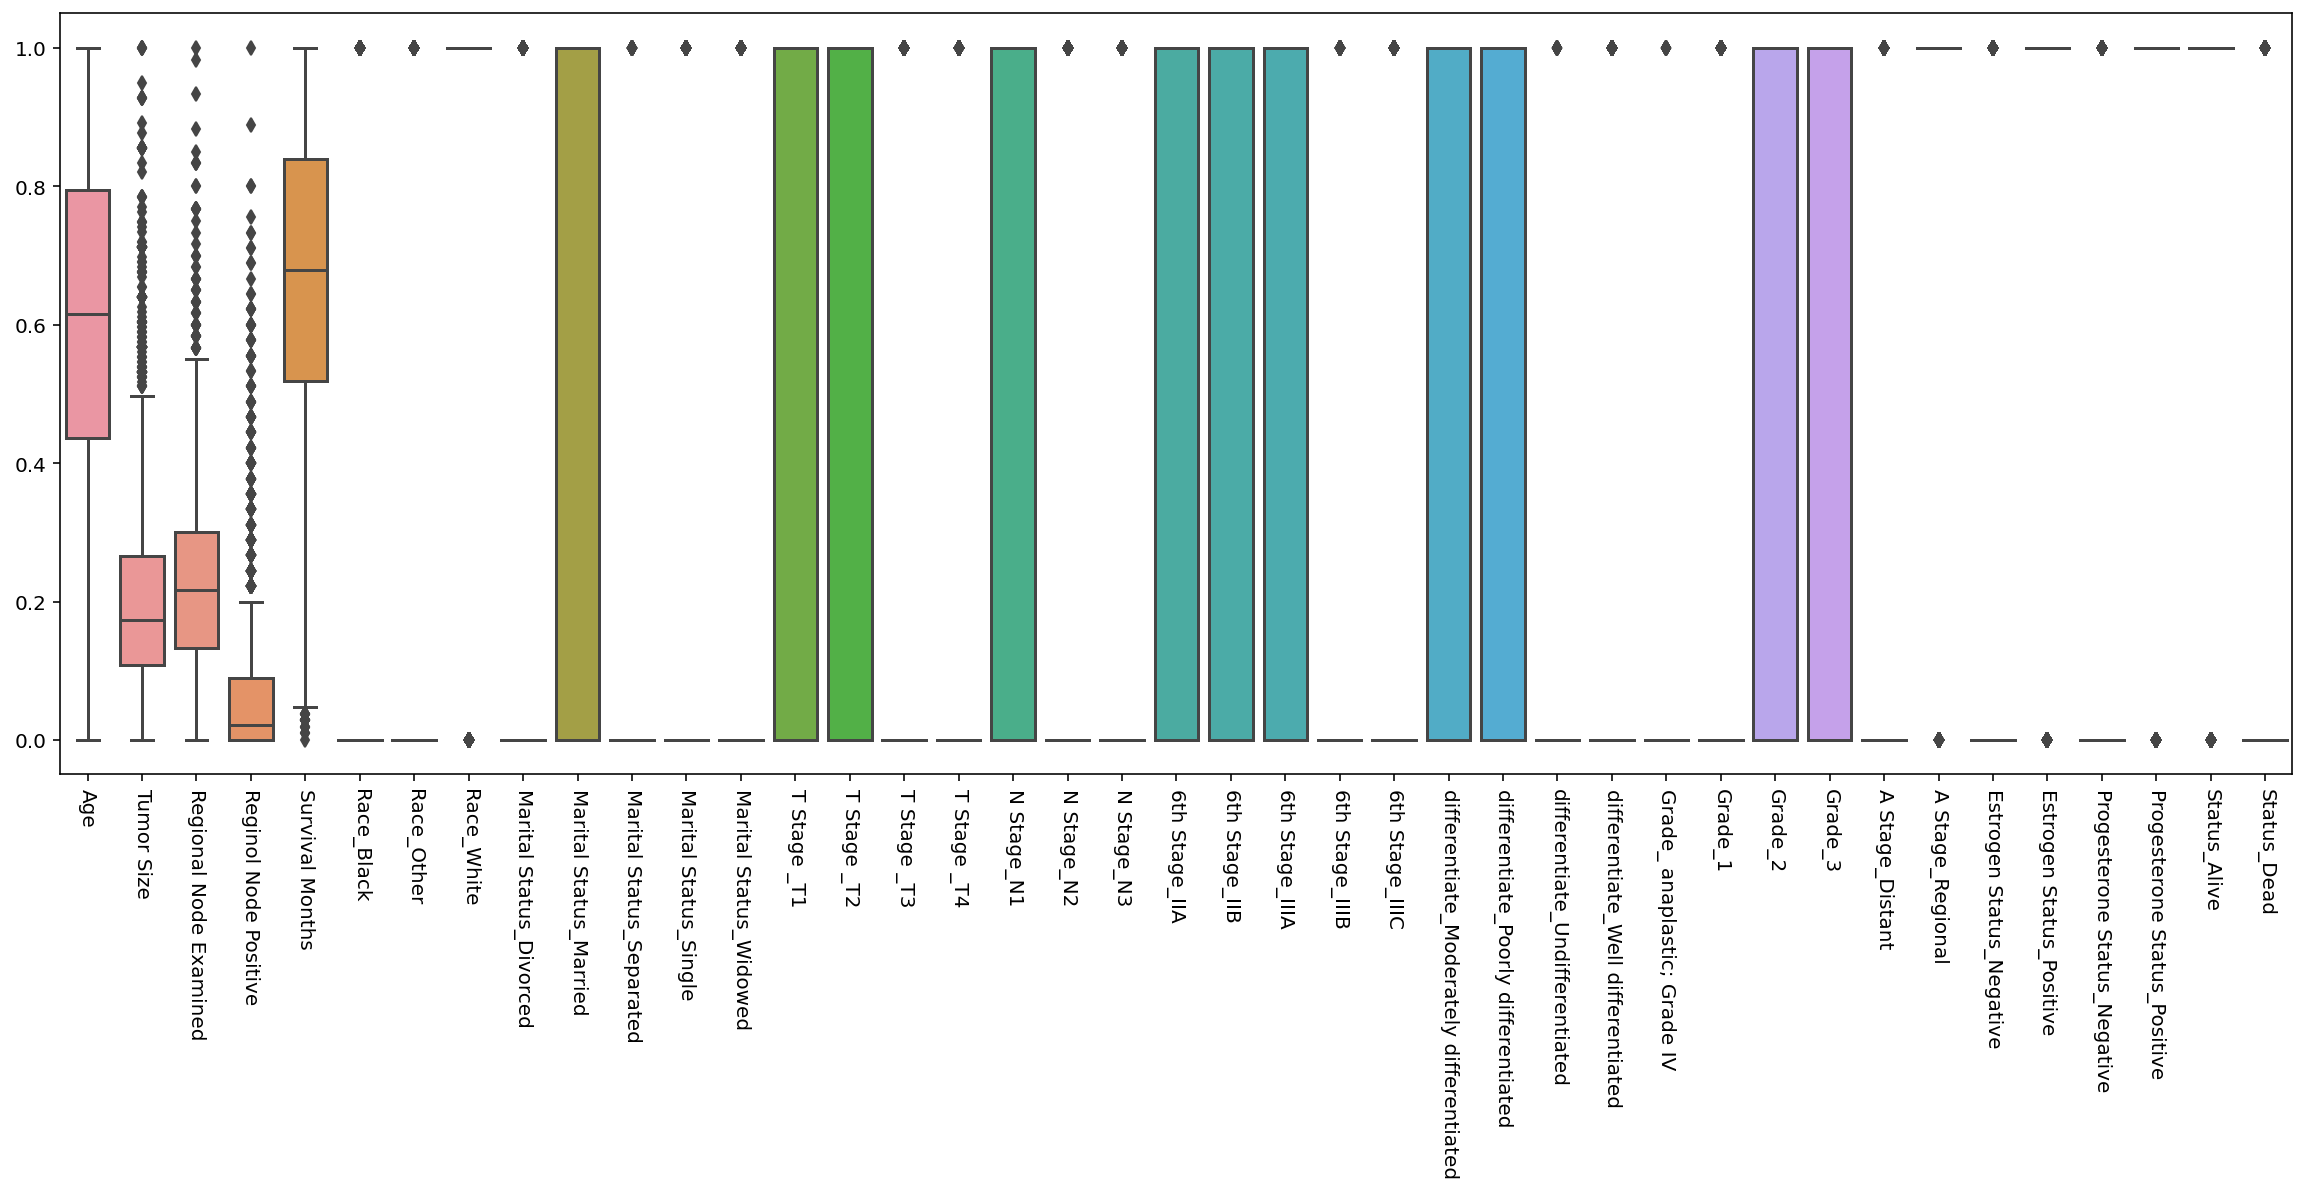

In [18]:
df = pd.get_dummies(df)
from sklearn import preprocessing

# Create x to store scaled values as floats
x = df[['Age', 'Tumor Size','Regional Node Examined', 'Reginol Node Positive','Survival Months']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['Age', 'Tumor Size','Regional Node Examined', 'Reginol Node Positive', 'Survival Months']] = pd.DataFrame(x_scaled)
plt.figure(figsize=(20,7))
plt.xticks(rotation=270)
sns.boxplot(data=df)

**Additional Analysis of the data**
>From the boxplot, we can tell:

>White women are more likely to be diagnosed of breast cancer.
Married women are more likely to be diagnosed of breast cancer than women in other marital status.
The disease concentrates on some certain stage and differentiate level.

In [19]:
# Checking the correlation between all the features in the data
df.corr()

Age  Tumor Size  \
Age                                      1.000000   -0.077215   
Tumor Size                              -0.077215    1.000000   
Regional Node Examined                  -0.033345    0.104352   
Reginol Node Positive                    0.012586    0.242322   
Survival Months                         -0.009390   -0.086901   
Race_Black                              -0.043348    0.000644   
Race_Other                              -0.083334    0.007283   
Race_White                               0.094113   -0.005955   
Marital Status_Divorced                  0.047953    0.020541   
Marital Status_Married                  -0.051305   -0.028056   
Marital Status_Separated                -0.028940   -0.001266   
Marital Status_Single                   -0.103948    0.015492   
Marital Status_Widowed                   0.209720    0.005053   
T Stage _T1                              0.061434   -0.622308   
T Stage _T2                             -0.017541    0.041831   
T Stage _T3                             -0.063654    0.746444   
T Stage _T4                              0.001383    0.196213   
N Stage_N1                               0.002378   -0.269523   
N Stage_N2                              -0.010476    0.146416   
N Stage_N3                               0.009664    0.207786   
6th Stage_IIA                            0.049955   -0.534645   
6th Stage_IIB                           -0.038351    0.004760   
6th Stage_IIIA                          -0.020129    0.369990   
6th Stage_IIIB                          -0.003280    0.146900   
6th Stage_IIIC                           0.009664    0.207786   
differentiate_Moderately differentiated  0.046329   -0.041800   
differentiate_Poorly differentiated     -0.093476    0.097969   
differentiate_Undifferentiated          -0.012730    0.044634   
differentiate_Well differentiated        0.058039   -0.076851   
Grade_ anaplastic; Grade IV             -0.012730    0.044634   
Grade_1                                  0.058039   -0.076851   
Grade_2                                  0.046329   -0.041800   
Grade_3                                 -0.093476    0.097969   
A Stage_Distant                         -0.020860    0.123883   
A Stage_Regional                         0.020860   -0.123883   
Estrogen Status_Negative                -0.059787    0.059585   
Estrogen Status_Positive                 0.059787   -0.059585   
Progesterone Status_Negative             0.021269    0.069879   
Progesterone Status_Positive            -0.021269   -0.069879   
Status_Alive                            -0.055921   -0.134205   
Status_Dead                              0.055921    0.134205   

                                         Regional Node Examined  \
Age                                                   -0.033345   
Tumor Size                                             0.104352   
Regional Node Examined                                 1.000000   
Reginol Node Positive                                  0.411580   
Survival Months                                       -0.022054   
Race_Black                                            -0.001530   
Race_Other                                             0.012898   
Race_White                                            -0.008620   
Marital Status_Divorced                                0.015391   
Marital Status_Married                                -0.009878   
Marital Status_Separated                               0.007275   
Marital Status_Single                                 -0.008240   
Marital Status_Widowed                                 0.007993   
T Stage _T1                                           -0.111722   
T Stage _T2                                            0.052942   
T Stage _T3                                            0.071209   
T Stage _T4                                            0.027053   
N Stage_N1                                            -0.282779   
N Stage_N2                                

Text(0.5, 1.0, 'Heat Map of the Correlation Between All the Features')

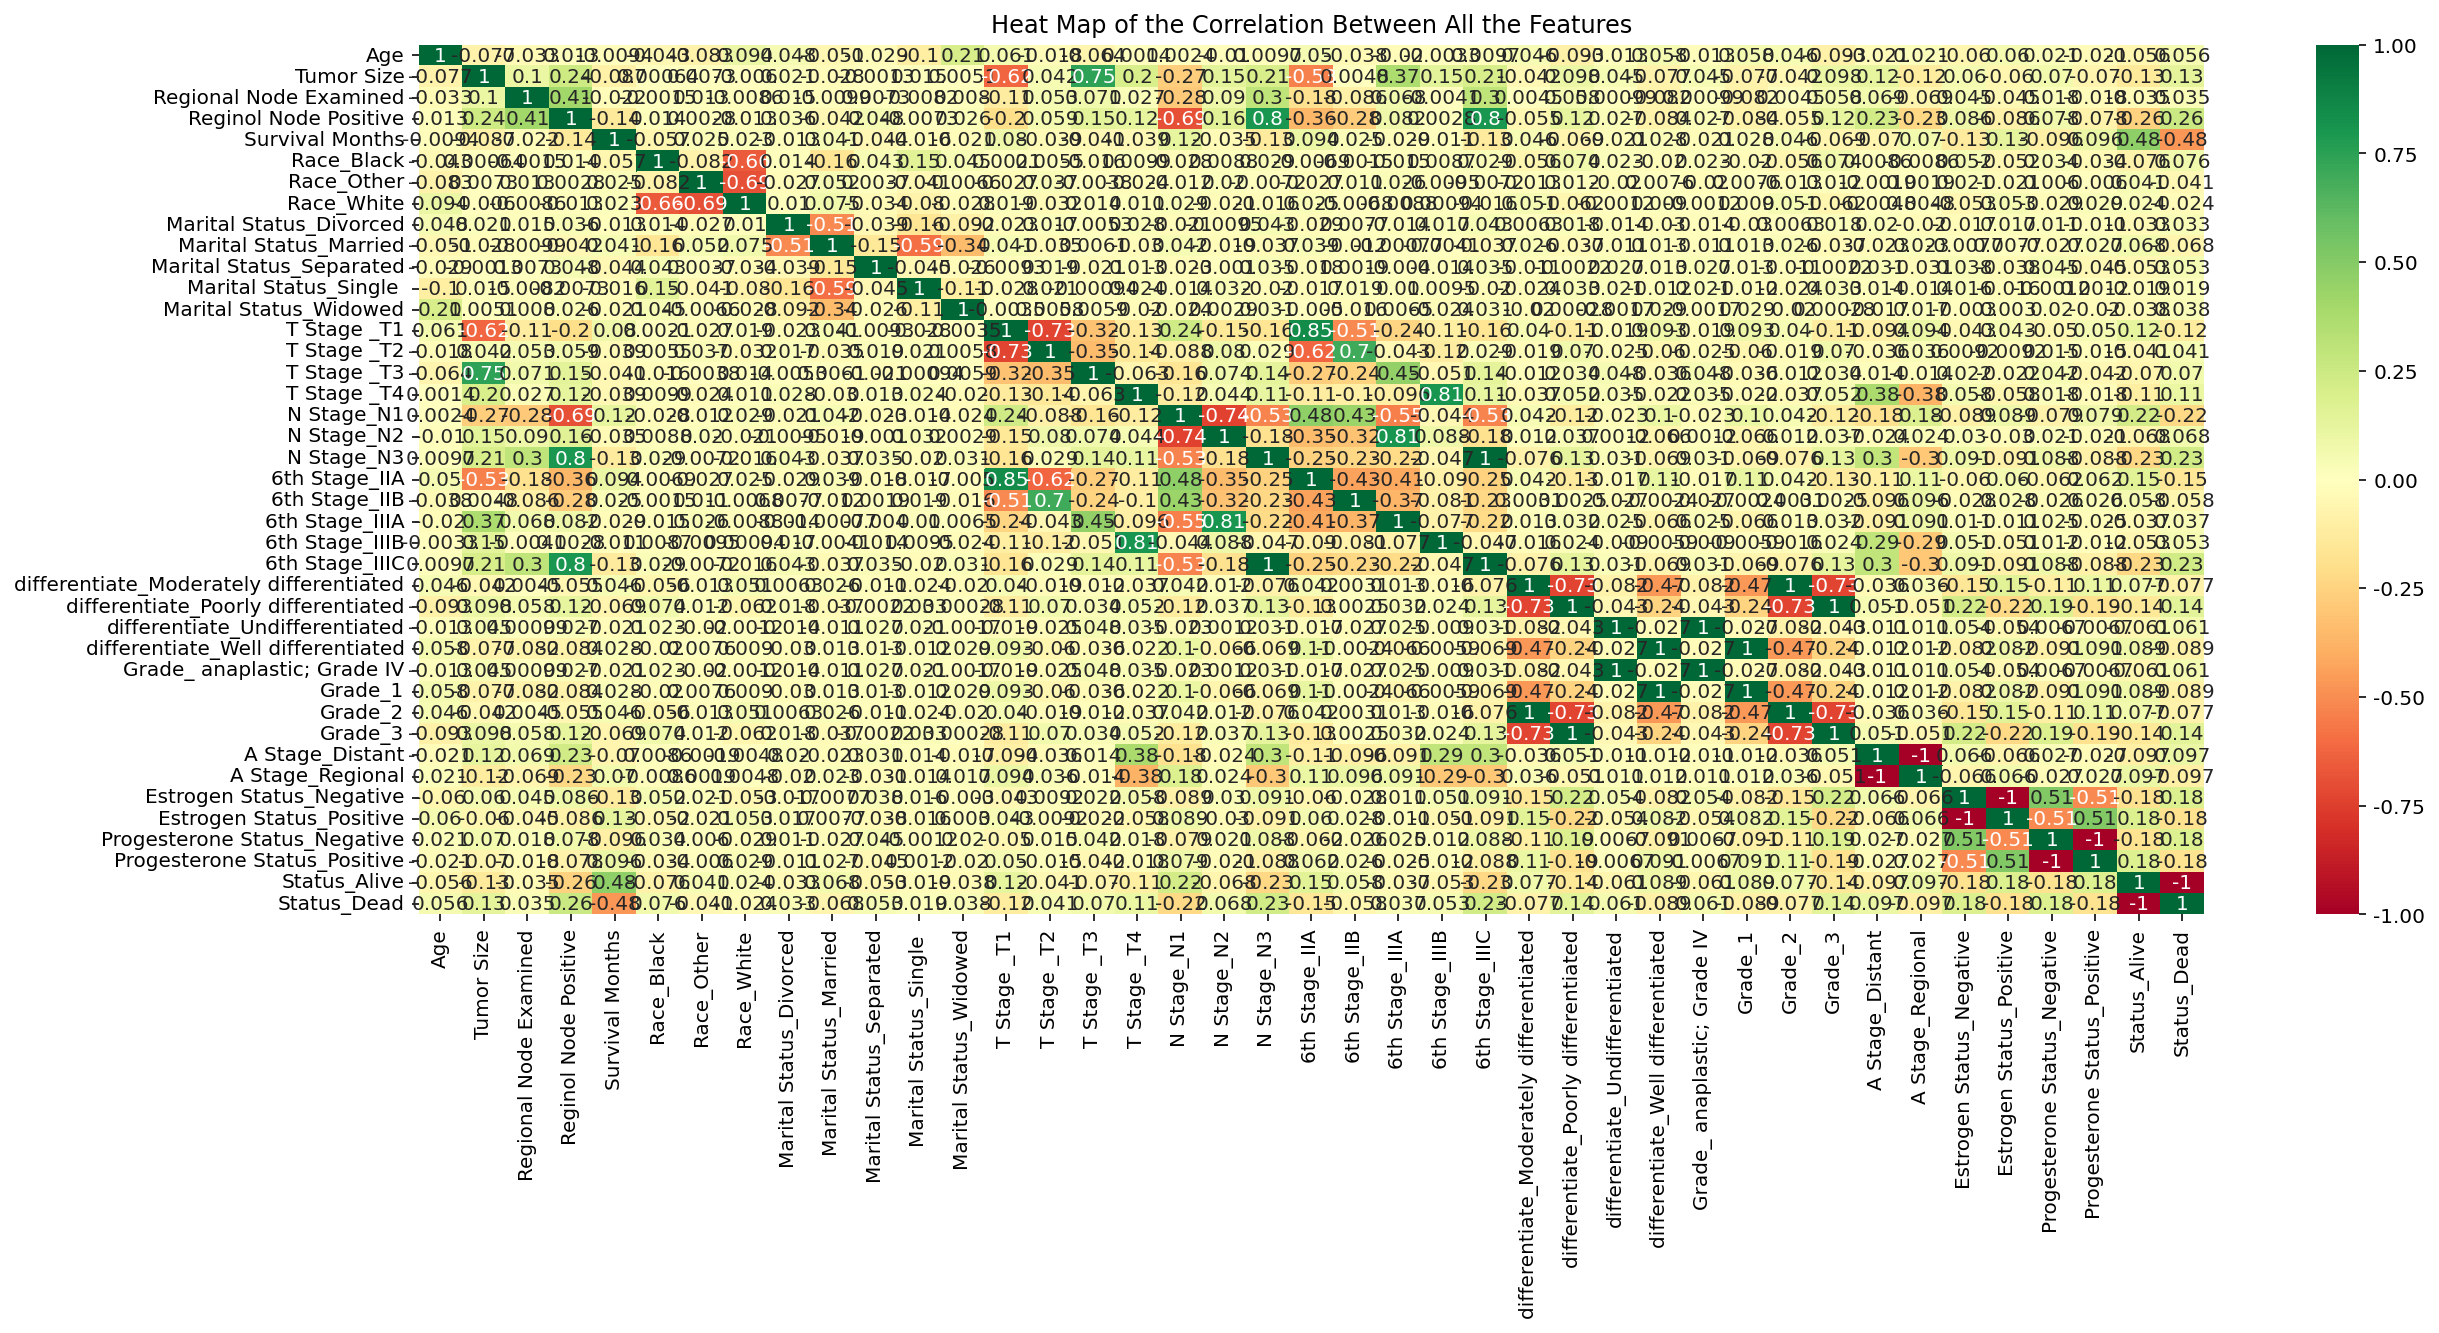

In [20]:
# Plot the heat map of the correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Heat Map of the Correlation Between All the Features')

Most of the variables are not correlated, but the Grade and the differentiate are closely correlated, for example, the correlation between "moderately differentiate" and "Grade 2", "pooly differentiate" and "Grade 3", "undifferentiate" and "Grade 4", "well differentiate" and "Grade 1" are all 1, which indicates these two independent variables are actually the same thing.

In [21]:
#pair plot to check the colinearity
sns.pairplot(df) 

***Identifying Predictor Significande***

In [27]:
import statsmodels.api as sm
model = sm.OLS(df['Status_Alive'], df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'Grade_ anaplastic; Grade IV', 'Grade_1', 'Grade_2', 'Grade_3', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Status_Alive   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     70.77
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          7.15e-295
Time:                        20:17:06   Log-Likelihood:                -862.23
No. Observations:                4024   AIC:                             1776.
Df Residuals:                    3998   BIC:                             1940.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Age                                        -0.0923      0.022     -4.274      0.000      -0.135      -0.050
Tumor Size                                  0.0284      0.064      0.444      0.657      -0.097       0.154
Regional Node Examined                      0.1719      0.039      4.429      0.000       0.096       0.248
Reginol Node Positive                      -0.4489      0.086     -5.223      0.000      -0.617      -0.280
Survival Months                             0.7023      0.022     31.299      0.000       0.658       0.746
Race_Black                                 -0.0154      0.014     -1.093      0.274      -0.043       0.012
Race_Other                                  0.0588      0.014      4.251      0.000       0.032       0.086
Race_White                                  0.0303      0.009      3.240      0.001       0.012       0.049
Marital Status_Divorced                     0.0206      0.015      1.377      0.169      -0.009       0.050
Marital Status_Married                      0.0412      0.011      3.632      0.000       0.019       0.063
Marital Status_Separated                   -0.0371      0.037     -1.002      0.316      -0.110       0.035
Marital Status_Single                       0.0304      0.014      2.167      0.030       0.003       0.058
Marital Status_Widowed                      0.0186      0.019      0.971      0.332      -0.019       0.056
T Stage _T1                                 0.0963      0.023      4.101      0.000       0.050       0.142
T Stage _T2                                 0.0656      0.018      3.690      0.000       0.031       0.101
T Stage _T3                                 0.0091      0.025      0.369      0.713      -0.039       0.058
T Stage _T4                                -0.0973      0.041     -2.354      0.019      -0.178      -0.016
N Stage_N1                                  0.0730      0.014      5.258      0.000       0.046       0.100
N Stage_N2                                 -0.0054      0.016     -0.340      0.734      -0.037       0.026
N Stage_N3                                  0.0062      0.012      0.526      0.599      -0.017       0.029
6th Stage_IIA                              -0.0165      0.024     -0.681      0.496      -0.064       0.031
6th Stage_IIB                              -0.0142      0.022     -0.648      0.517      -0.057       0.029
6th Stage_IIIA                              0.0466      0.022      2.130      0.033       0.004       0.090
6th Stage_IIIB                              0.0517      0.050      1.028      0.304      -0.047       0.150
6th Stage_IIIC                              0.0062      0.012      0.526      0.599      -0.017       0.029
differentiate_Moderately differentiated     0.0458      0.0

The **Age** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Tumor Size** has the p-value 0.657, which is greater and hence it is a non significant feature.

The **Regional Node Examined** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Regional Node Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Survival Months** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Race_Black** has the p-value 0.274, which is greater and hence it is a non significant feature.

The **Race_Other** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Race_White** has the p-value 0.001, which is lesser and hence it is a significant feature.

The **Marital Status_Divorced** has the p-value 0.169, which is greater and hence it is a non significant feature.

The **Marital Status_Married** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Marital Status_Separated** has the p-value 0.316, which is greater and hence it is a non significant feature.

The **Marital Status_Single** has the p-value 0.030, which is greater and hence it is a non significant feature.

The **Marital Status_Widowed** has the p-value 0.332, which is greater and hence it is a non significant feature.

The **T Stage_T1** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **T Stage_T2** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **T Stage_T3** has the p-value 0.713, which is greater and hence it is a non significant feature.

The **T Stage_T4** has the p-value 0.019, which is greater and hence it is a non significant feature.

The **N Stage_N1** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **N Stage_N2** has the p-value 0.734, which is greater and hence it is a non significant feature.

The **N Stage_N3** has the p-value 0.599, which is greater and hence it is a non significant feature.

The **6th Stage_IIA** has the p-value 0.496, which is greater and hence it is a non significant feature.

The **6th Stage_IIB** has the p-value 0.517, which is greater and hence it is a non significant feature.

The **6th Stage_IIIA** has the p-value 0.033, which is greater and hence it is a non significant feature.

The **6th Stage_IIIB** has the p-value 0.304, which is greater and hence it is a non significant feature.

The **6th Stage_IIIA** has the p-value 0.599, which is greater and hence it is a non significant feature.

The **differentiate_Moderately differentiated** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **differentiate_Poorly differentiated** has the p-value 0.008, which is greater and hence it is a non significant feature.

The **differentiate Undifferentiated** has the p-value 0.028, which is greater and hence it is a non significant feature.

The **differentiate_Well differentiated** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_IV** has the p-value 0.028, which is greater and hence it is a non significant feature.

The **Grade_I** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_II** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Grade_III** has the p-value 0.008, which is greater and hence it is a non significant feature.

The **A Stage_Distant** has the p-value 0.018, which is greater and hence it is a non significant feature.

The **A Stage_Regional** has the p-value 0.143, which is greater and hence it is a non significant feature.

The **Estrogen Status_Negative** has the p-value 0.691, which is greater and hence it is a non significant feature.

The **Estrogen Status_Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.

The **Progesterone Status_Negative** has the p-value 0.756, which is greater and hence it is a non significant feature.

The **Progesterone Status_Positive** has the p-value 0.0, which is lesser and hence it is a significant feature.


# ***Linear Regression Using AutoML***

>In this section, AutoML is used for the regression task. By applying AutoML, the status of a breast cancer patient could be predicted based on attributes like survival months, tumor size, etc. 
Since the dataset is analyzed in the previous section, automl is set up for the linear regression problem. After training for a period of time, mse is used to evaluate the performance of a model. Details will be explained by the end of each model.

In [28]:
# Install and import packages ///Citation 1
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt # plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.5 MB 43 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.3-py2.py3-none-any.whl size=177541401 sha256=33781a7af8d7d3d846778ed7b73e9ca8f42bee891c7c1f6384b670c4bb0d01bd
  Stored in directory: /root/.cache/pip/wheels/16/f8/f4/69e1ff6a0d1cb61bdbc0d9888ee8437a1acf1eb1c6ffb8be20
Successfully built h2o


In [29]:
# Define a function to get the independent variables ///Citation 1
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [30]:
# Initialize the h2o ///Citation 1
min_mem_size=6 
run_time=222
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:18472 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpoxhw9nzf
  JVM stdout: /tmp/tmpoxhw9nzf/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpoxhw9nzf/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:18472
Connecting to H2O server at http://127.0.0.1:18472 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    22 days
H2O_cluster_name:           H2O_from_python_unknownUser_iz9dup
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:18472
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.16 final
--------------------------  ----------------------------------

In [34]:
# Split the train, validation and test dataset
data = h2o.import_file('Breast_Cancer.csv')
trainset, testset, valid = data.split_frame(ratios=[0.6, 0.2])
y = "Status"
# trainset = trainset.drop('MEDV')
x = trainset.columns
print(x)
x = x[:-1:]
print(x)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']
['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [35]:
# Set up AutoML ///Citation 1
from sklearn.model_selection import train_test_split

In [36]:
# Start training with AutoML ///Citation 1
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=trainset, validation_frame = valid)

AutoML progress: |
20:21:26.251: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221215_202126

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.05238742615954786
RMSE: 0.2288829966588778
LogLoss: 0.18734848929905334
AUC: 0.961199480603798
AUCPR: 0.8627542374631804
Gini: 0.922398961207596
Null degrees of freedom: 2385
Residual degrees of freedom: 2377
Null deviance: 2045.053958636688
Residual deviance: 894.0269909350825
AIC: 912.0269909350825

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.308680342831877
       Alive    Dead    Error    Rate
-----  -------  ------  -------  --------------
Alive  1948     72      0.0356   (72.0/2020.0)
Dead   94       272     0.2568   (94.0/366.0)
Total  2042     344     0.0696   (166.0/2386.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.30868      0.766197  175
max f2                       0.132055     0.808398  259
max f0point5                 0.596698     0.838534  110
max accuracy                 0.415534     0.932942  147
max precision                0.964838     1         0
max recall                   0.0440413    1         341
max specificity              0.964838     1         0
max absolute_mcc             0.30868      0.725858  175
max min_per_class_accuracy   0.148965     0.882178  247
max mean_per_class_accuracy  0.132055     0.890076  259
max tns                      0.964838     2020      0
max fns                      0.964838     363       0
max fps                      0.00574327   2020      399
max tps                      0.0440413    366       341
max tnr                      0.964838     1         0
max fnr                      0.964838     0.991803  0
max fpr                      0.00574327   1         399
max tpr                      0.0440413    1         341

Gains/Lift Table: Avg response rate: 15.34 %, avg score: 15.63 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100587                   0.938912           6.51913    6.51913            1                0.950987   1                           0.950987            0.0655738       0.0655738                  551.913   551.913            0.0655738
2        0.0201174                   0.920259           6.51913    6.51913            1                0.930421   1                           0.940704            0.0655738       0.131148                   551.913   551.913            0.131148
3        0.030176                    0.899575           6.51913    6.51913            1                0.910229   1                           0.930546            0.0655738       0.196721                   551.913   551.913            0.196721
4        0.0402347                   0.872291           6.51913    6.51913            1                0.884347   1                           0.918996            0.0655738       0.262295                   551.913   551.913            0.262295
5        0.0502934                   0.834861           6.51913    6.51913            1                0.854221   1                           0.906041            0.0655738       0.327869                   551.913   551.913            0.327869
6        0.100168                    0.557574           5.47826    6.00087            0.840336         0.707309   0.920502                    0.807091            0.273224        0.601093  

In [38]:
# Overview of the performance of the best models ///Citation 1
print(aml.leaderboard)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20221215_202126     0.866013   0.269985  0.692488                0.208308  0.275484  0.0758915
GBM_1_AutoML_1_20221215_202126                           0.86594    0.272057  0.693457                0.208308  0.276832  0.0766358
StackedEnsemble_BestOfFamily_1_AutoML_1_20221215_202126  0.865342   0.272778  0.685542                0.210921  0.277172  0.0768243
XGBoost_1_AutoML_1_20221215_202126                       0.860472   0.277502  0.669188                0.228818  0.279147  0.0779229
GLM_1_AutoML_1_20221215_202126                           0.859772   0.286842  0.658956                0.239609  0.288208  0.083064
XRT_1_AutoML_1_20221215_202126                           0.856005   0.284535  0.674292                0.225829  0.283306  0.0802625
GBM_2_AutoML_1_20221215_202126                           0.855707   0.276638 

***Examine the Best Model***

In [39]:
# Get the best model ///Citation 1
best_model = h2o.get_model(aml.leaderboard[2,'model_id'])

In [40]:
# Print the best model ///Citation 1
best_model.algo

'stackedensemble'

In [41]:
# Import the packages for plotting ///Citation 1
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

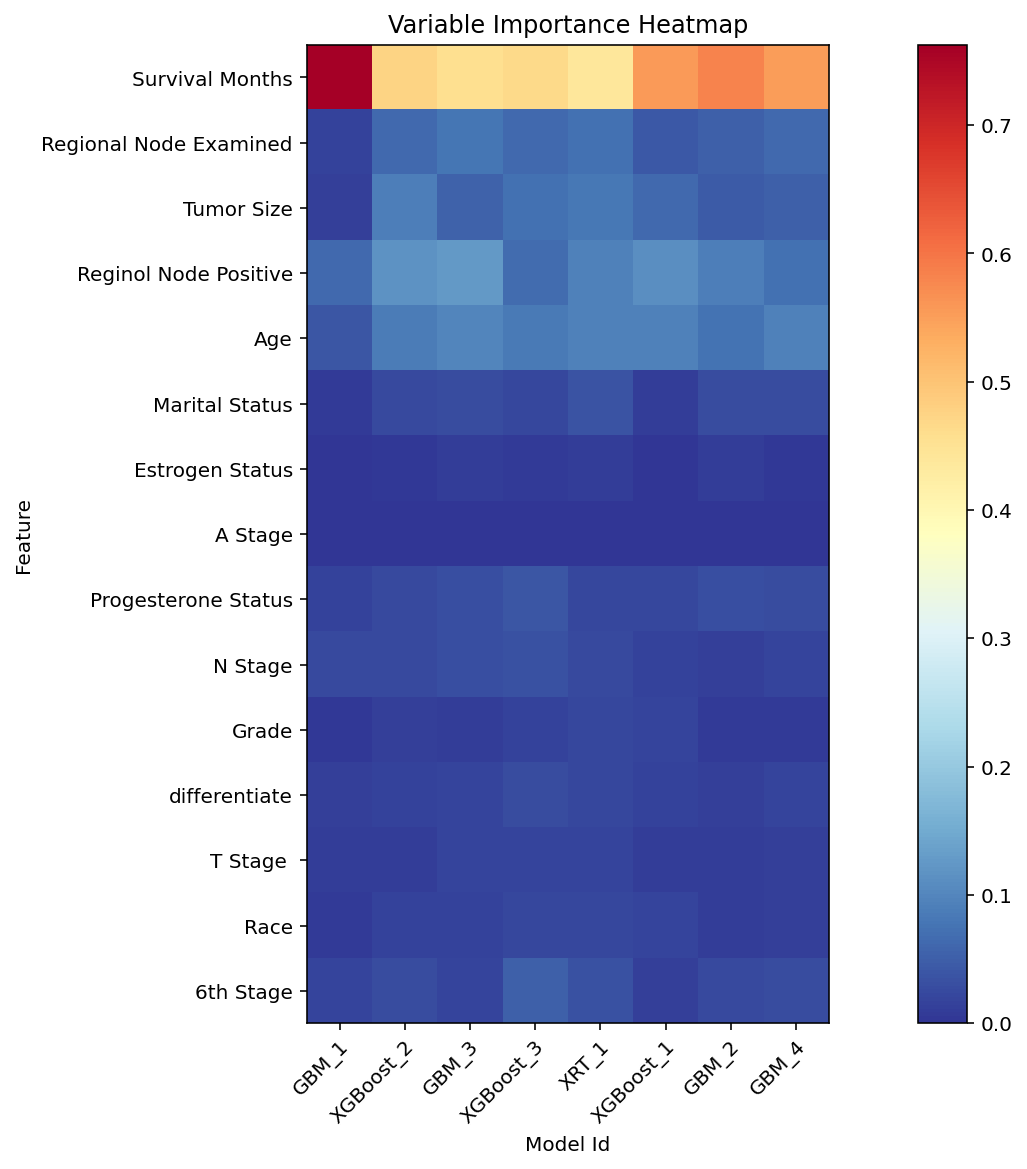

In [45]:
# The variable importance plot function for stackedensemble is not implemented in h2o yet, instead, 
# a heat map is plotted to show the importance of the variables based on the mse.
va_plot = h2o.varimp_heatmap(aml.leaderboard.sort("mse").head(10))

>This section has tried to apply the automl algorithm to regression task. After analyzing the data, the model is trained with a trainset, validated with a validation set and finally tested with a test set. Therefore, we could draw a conclusion that automl is a powerful and useful technique for training and predicting models, although for different tasks, hyperparameters need to be carefully chosen accordingly.

# ***Model Interpretability***

>Usually data scientists and machine learning scientists don't care much about what is going on inside of a model, why the coeffitients are trained to certain values, they only care about accuracy and performance of a model on test dataset. However, in real world, interpretation is always of vital importance. We need to know why a model is trained to have certain coefficients and give explanations to customers when needed. Therefore, in this section, we will focus on how to interpret a linear model.

In [46]:
# Import packages ///Citation 4
!pip install shap
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 3.2 MB/s 


In [47]:
# Import the dataset and split the train, test, validation dataset ///Citation 2
from sklearn.model_selection import train_test_split
data = pd.read_csv('Breast_Cancer.csv')
data = pd.get_dummies(data)
# Create x to store scaled values as floats
# x = data[['Age', 'Tumor Size','Regional Node Examined', 'Reginol Node Positive','Survival Months']].values.astype(float)
X = data[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Race_Black', 'Race_Other','Race_White', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3', 'T Stage _T4', 'N Stage_N1',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC',
       'differentiate_Moderately differentiated', 'differentiate_Poorly differentiated', 'differentiate_Undifferentiated', 
       'differentiate_Well differentiated', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Negative', 'Progesterone Status_Positive']]

y = data['Status_Alive']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_testset, y_t, y_testset = train_test_split(X, y, test_size=0.15, random_state=1)
X_trainset, X_valset, y_trainset, y_valset = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [49]:
# Build a Logistic Regression Model and use it to train on the train dataset ///Citation 5
import sklearn
model = sklearn.linear_model.LogisticRegression(penalty="none", C=0.1)
model.fit(X_trainset, y_trainset)
# Calculate the shapley values
explainer = shap.LinearExplainer(model, X_trainset, feature_dependence="independent")
shap_values = explainer.shap_values(X_testset)

Setting penalty='none' will ignore the C and l1_ratio parameters
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


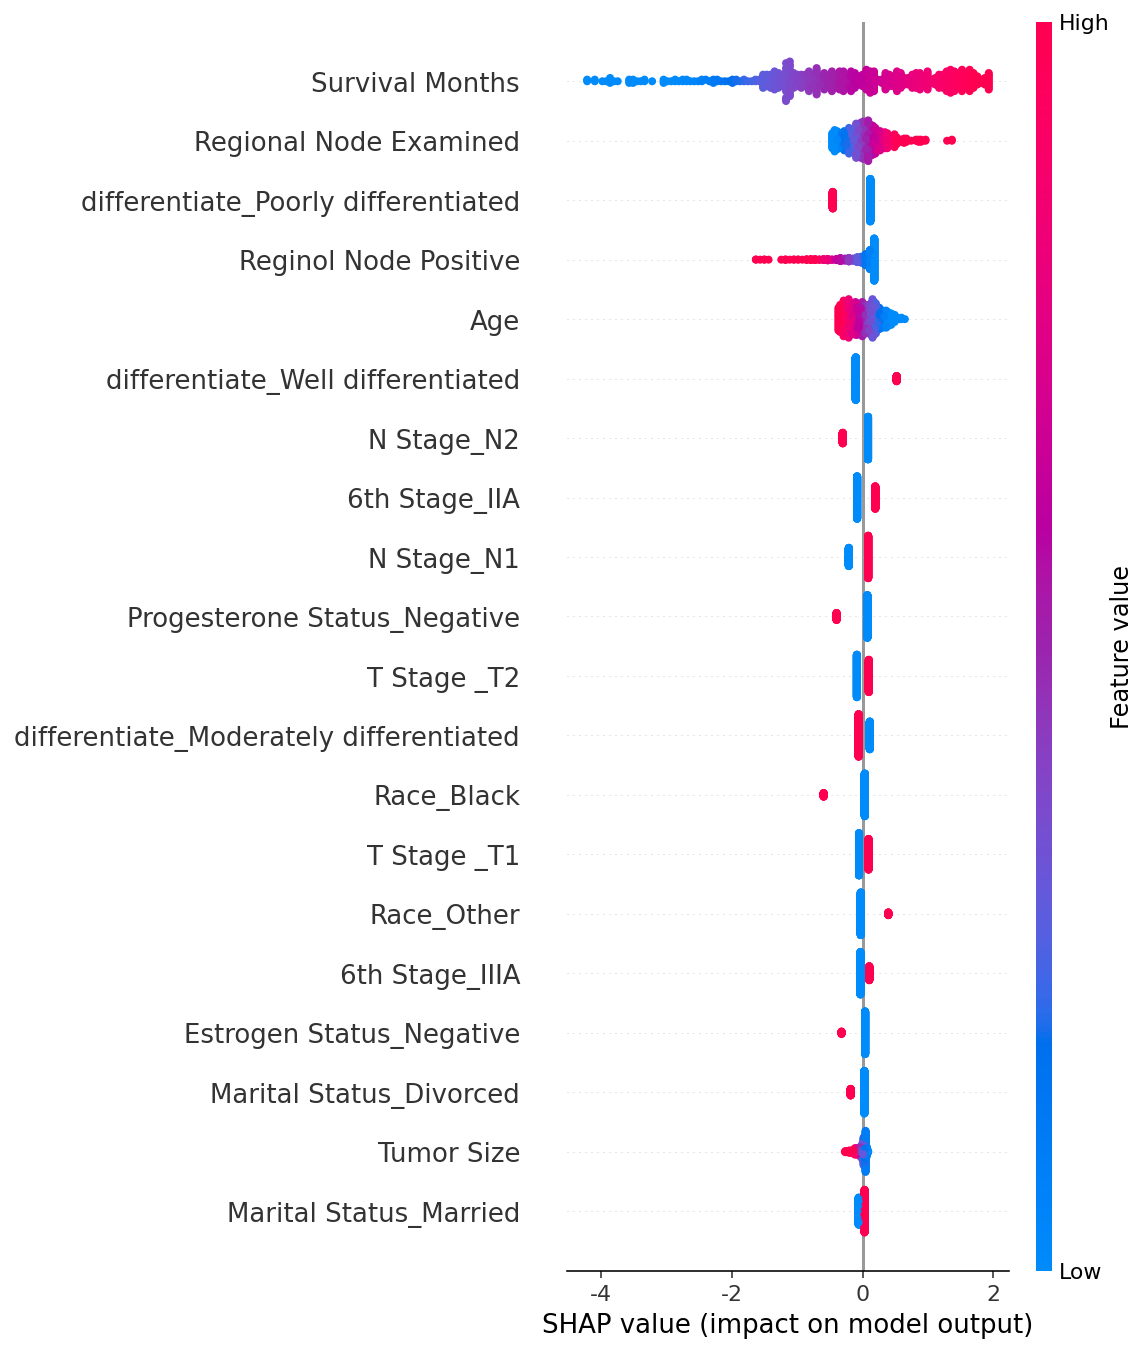

In [50]:
# Summarize the effect of all the features ///Citation 5
shap.summary_plot(shap_values, X_testset, feature_names=X_trainset.columns)

In the plots below, higher means more likely to be negative, so in the plots below the "red" features are actually helping raise the chance of a patient to be alive, while the negative features are lowering the chance.

In [51]:
# Explain the first patient's survival status prediction ///Citation 5
ind = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_testset.iloc[ind,:])

In [52]:
# Explain the second review's patient's survival status prediction ///Citation 5
ind = 1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_testset.iloc[ind,:])

In [53]:
# Explain the third review's patient's survival status prediction ///Citation 5
ind = 2
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_testset.iloc[ind,:])

With the shapley values, we could analyze on each patient and provide a reasonable explanation, which features will benefit, which features will not and what they could do to increase the chance to live.

>In addition to caring about the accuracy of a model, we also need to know how to interpret the model, that is to say, when feed the trained model a new data, we need to be able to explain why we can get a certain output, how the features contribute, which features have positive impacts on prediction and which features have negative impacts. Shapley values could be a useful tool to help us interpret the model. With better knowledge of what's going on in the model, we could offer suggestion to clients what they can do to achieve their target.

# ***Questions***
1. What is the question?
>Ans: When we are given a dataset, what do we need to do to learn about the dataset and use it to make prediction? How can we build a model? How do we interpret the model?
2. What did you do?
>Ans: The first step is to analyze the data, calculating the mean value, median value and standard deviation, checking the distribution of each feature, plotting the correlation map, and calculating the p value for each feature and finally selecting the most important features to build model. The second step is to build a model, in this notebook, I built a linear regression model. The dataset is firstly split into train, validation and test datasets, then the trainset is used to train the model, validation is used to test. Then I used automl to select the best model which has the smallest mean squared error. The third step is to interpret the model with shapley values. The shapley value plots are plotted for a specific input, thus for every input we can see how each feature contributes to a certain prediction.
3. How well did it work?
>Ans: Each step goes as expectations. The best model automl found is "stackedensemble", the mse of which is 0.07. And according to the shapley value plots, we could make recommendations for each patient, what they could do to remain their status to be "Alive".
4. What did you learn?
>Ans: The most important thing is before actually building a model, we need to know the dataset very well. We need to dig as many details as we can, insert the missing values (if any), check the correlation between independent variables, this is very important, because multicollinearity actually violates our assumption, if we find such correlation in the investigating process, we need to eliminate these correlations to make our model more reliable. The second thing is we need to carefully choose our model, there always are a lot of options for us to choose from, the greatest trade-off is the variance-bias trade-off, we need to carefully find the perfect balance, and for similar performance, we favor simple models. Additionally, regularization and certain hyperparameters are also important stuff to be carefully chosen. Finally, apart from minimizing mse and increasing auc, we also need to pay attention to how to interpret the models. In real life, we always need to know what is going on in a model, why we get certain prediction, how can we make a change, correctly using shapley values can help us answer such questions.

# ***References***

1. Aiskunks. “SKUNKS_SKOOL/6105_H2O_automl_lending_club.Ipynb at Main · Aiskunks/skunks_skool.” GitHub, https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb.

2. Google. (n.d.). Google colaboratory. Google Colab. Retrieved December 5, 2022, from https://colab.research.google.com/drive/1dBwER-IDnRa18KeglEeM-wq3ctT2SUAM#scrollTo=zI-8QRYGu1yB 

3. Google. (n.d.). Google colaboratory. Google Colab. Retrieved December 5, 2022, from https://colab.research.google.com/drive/1IjFwGJ5Oqnj2Dl-bQGTmD3tkK33vb2oj#scrollTo=vnKzM6SAVg_z 

4. Ajhalthor. (2021, April 29). Model-interpretability/SHAP values.ipynb at main · Ajhalthor/model-interpretability. GitHub. Retrieved December 5, 2022, from https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb 

5. Sentiment analysis with logistic regression¶. Sentiment Analysis with Logistic Regression. (n.d.). Retrieved December 5, 2022, from https://slundberg.github.io/shap/notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html 

6. Calculating shap values for GBM models in H2O. | notebook.community. (n.d.). Retrieved December 5, 2022, from https://notebook.community/michalkurka/h2o-3/h2o-py/demos/shap_values_gbm 